## Import de la base de donnée et pré-traitement


In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from src.descriptive_statistics import descriptive_statistics

import pandas as pd 
import numpy as np
from src.graph.graph import plot_time_series


df = pd.read_pickle('src/data/panel_data.pkl')
df["index"] = pd.to_datetime(df["index"])

df = df[(df['index'] >= '1988-01-01') & (df['index'] <= '2017-01-31')]
df= df[~df['index'].isin(['1987-10-19', '2001-09-11'])]

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df)

          index  Maturity 1  Maturity 2  Maturity 3  Maturity 4  Maturity 5
0    1988-01-04      187.50      193.50      198.25      200.00      202.75
1    1988-01-05      187.50      193.25      197.25      198.25      200.75
2    1988-01-06      191.00      195.75      199.75      201.75      204.50
3    1988-01-07      192.75      198.75      202.75      204.50      208.50
4    1988-01-08      192.50      198.00      202.00      203.50      207.25
...         ...         ...         ...         ...         ...         ...
7308 2017-01-25      366.25      373.50      380.75      387.00      393.75
7309 2017-01-26      363.75      371.00      378.00      384.25      390.75
7310 2017-01-27      362.50      369.75      376.50      383.00      389.25
7311 2017-01-30      357.75      365.00      372.00      378.75      385.50
7312 2017-01-31      359.75      367.00      373.75      380.50      387.25

[7332 rows x 6 columns]


C:\Users\naiml\AppData\Local\Temp\ipykernel_1988\157157224.py:14: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df= df[~df['index'].isin(['1987-10-19', '2001-09-11'])]


## Statistiques descriptives

In [16]:
original_stats, log_stats = descriptive_statistics(df["Maturity 1"])

stats_keys = ['Mean', 'Median', 'Minimum', 'Maximum', 'Std deviation', 'Skewness', 'Kurtosis', 'Autocorrelation', 'ADF test p-value (10 lags)', 'Nb obs']
df_combined_stats = pd.DataFrame(index=stats_keys, columns=['Prices (c/bu)', 'Log returns'])

for key in stats_keys:
    df_combined_stats.loc[key, 'Prices (c/bu)'] = original_stats.get(key, np.nan)
    log_key = 'Log ' + key  
    df_combined_stats.loc[key, 'Log returns'] = log_stats.get(log_key, np.nan)
    
df_combined_stats

,Prices (c/bu),Log returns
Mean,328.107304,0.000089
Median,269.5,0.0
Minimum,174.75,-0.272125
Maximum,831.25,0.127571
Std deviation,143.72783,0.01715
Skewness,1.532797,-1.036577
Kurtosis,1.575911,19.622285
Autocorrelation,0.998794,0.050251
ADF test p-value (10 lags),0.159332,0.0
Nb obs,7332,7331


## Graphique


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


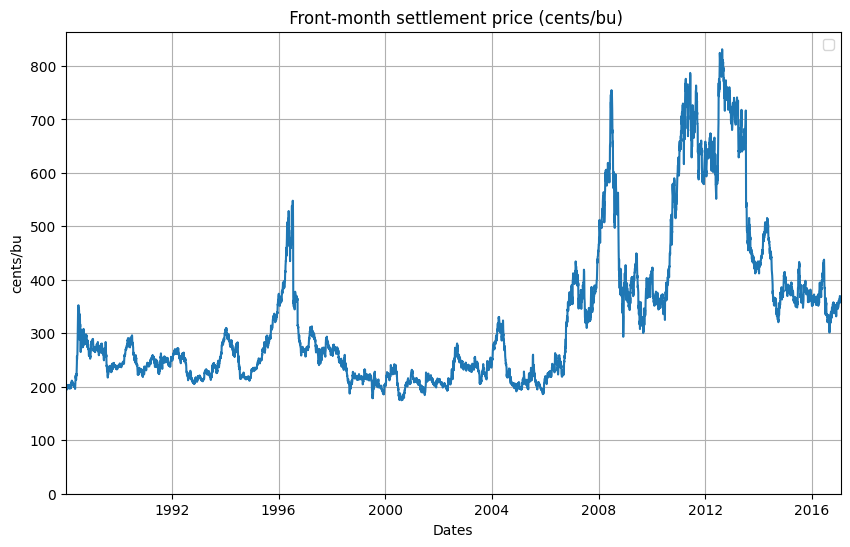

In [17]:
plot_time_series(df,"Maturity 1",  " Front-month settlement price (cents/bu)", "Dates", "cents/bu")